# Case - Base dos Dados

Objetivo: laborar uma visualização, usando pela menos uma base do nosso datalake.

Projeto: encontrar a razão entre as receitas agropecuárias municipais e o valor total da produção agropecuária municipal.


In [ ]:
#Insalando o pacote basedosdados

pip install basedosdados

In [2]:
#importando pacotes relevantes para a análise

import basedosdados as bd
import pandas as pd

In [115]:
#acessando o datalake da base dos dados via SQL. Os dados utilizados na análise provem do siconfi (imagino que seja do dca),
# Censo Agro 2017 do IBGE e o diretório de municípios da base dos dados

df = bd.read_sql(
    '''
    SELECT 
        m.id_municipio, 
        m.nome AS municipio, 
        s.valor AS receita_agro, 
        c.valor_producao_total*1000000 AS valor_producao_agro -- creio que os números do valor da produção estejam em milhões
        
    FROM `basedosdados.br_me_siconfi.municipio_receitas_orcamentarias` AS s
    
    INNER JOIN `basedosdados.br_ibge_censo_agropecuario.municipio` AS c
        ON s.id_municipio = c.id_municipio
        
    INNER JOIN `basedosdados.br_bd_diretorios_brasil.municipio` AS m
        ON m.id_municipio = c.id_municipio
        
    WHERE s.ano = 2017
        AND c.ano = 2017
        AND s.conta_bd = 'Receitas Agropecuárias'
        
    ORDER BY id_municipio
    ''',
    billing_project_id='project-bd-py'
)

df.head()

Downloading: 100%|████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 823.70rows/s]


,id_municipio,municipio,receita_agro,valor_producao_agro
0,1302702,Manicoré,1871.00,2000000.0
1,1507458,São Geraldo do Araguaia,1739.25,12000000.0
2,1709302,Guaraí,187.00,431000000.0
3,1716703,Colméia,6227.00,0.0
4,2110203,Santa Rita,1146.76,284000000.0


In [43]:
# encontrando a proproção das receitas agropecuárias como proporção do valor da produção agropecuária (%)
razao = df.receita_agro / df.valor_producao_agro *100

#incluindo coluna na data.frame
df['razao'] = razao

df

,id_municipio,municipio,receita_agro,valor_producao_agro,razao
0,1302702,Manicoré,1871.00,2.000000e+06,0.093550
1,1507458,São Geraldo do Araguaia,1739.25,1.200000e+07,0.014494
2,1709302,Guaraí,187.00,4.310000e+08,0.000043
4,2110203,Santa Rita,1146.76,2.840000e+08,0.000404
11,3111101,Campina Verde,1117.71,1.000000e+07,0.011177
...,...,...,...,...,...
233,4320602,Severiano de Almeida,24.95,5.000000e+06,0.000499
244,5106158,Nova Bandeirantes,658.50,8.060000e+08,0.000082
245,5107909,Sinop,12143.11,5.830000e+09,0.000208
246,5108808,Nova Guarita,100.00,1.828000e+09,0.000005


In [66]:
#utilizando o pacote numpy para tratar os dados
import numpy as np

#alguns valores da produção agricola estão zerados,resultando em razões "inf". Removendo os valores infinitos
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

#ordenando os valores do maior para o menor
df = df.sort_values(by='razao',ascending=False)
df

,id_municipio,municipio,receita_agro,valor_producao_agro,razao
143,4212403,Pedras Grandes,97688.00,1.000000e+06,9.768800e+00
109,4203501,Campo Erê,53753.39,1.000000e+06,5.375339e+00
154,4216107,São Domingos,53750.11,1.000000e+06,5.375011e+00
142,4212270,Passos Maia,51100.00,1.000000e+06,5.110000e+00
232,4320453,Sério,84403.51,2.000000e+06,4.220175e+00
...,...,...,...,...,...
187,4302709,Butiá,3.95,6.295000e+09,6.274821e-08
196,4306601,Dom Pedrito,65.00,3.392790e+11,1.915827e-08
165,4217808,Taió,2.42,1.493000e+10,1.620898e-08
213,4310603,Itaqui,25.00,5.684660e+11,4.397800e-09


In [10]:
# importando o pacote matplotlib para tratar os dados
import matplotlib.pyplot as plt

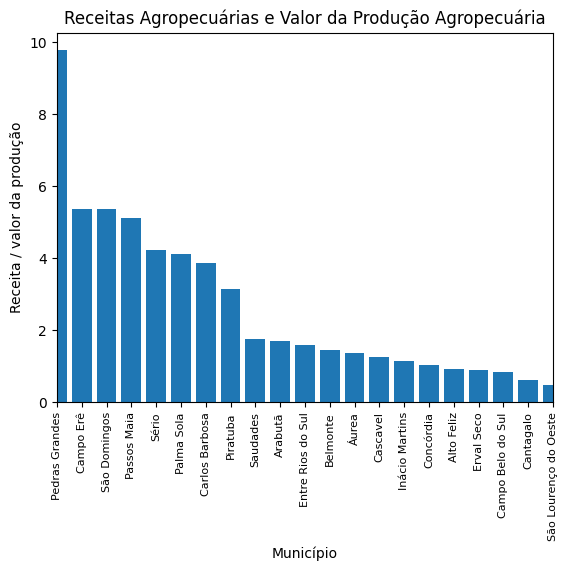

In [109]:
#plotando os 20 municipíos brasileiros com maior receita como proporção do valor da produção agropecuária.

plt.bar(df.municipio, df.razao)
plt.title('Receitas Agropecuárias e Valor da Produção Agropecuária')
plt.ylabel('Receita / valor da produção')
plt.xlabel('Município')
plt.xlim([0, 20])
plt.xticks(rotation = 90)
plt.xticks(fontsize=8)
plt.show()